In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('DataEngineer.csv')
df['Company Name'] = df['Company Name'].map(lambda x: x.split('\n')[0])
df['Salary Estimate'] = df['Salary Estimate'].map(lambda x: int(x.split('(')[0].split('K-')[0].replace('$', ''))).astype('float')
df['Headquarters'] = df['Headquarters'].replace('-1', 'Not specified')
df['Sector'] = df['Sector'].replace('-1', 'Not specified')
df['Rating'] = df['Rating'].astype('float')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,80.0,Company Description\nSagence is a management a...,4.5,Sagence,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,80.0,"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,80.0,Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,80.0,About the Position\n\n\nThis position will sup...,4.8,Jane Street,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,80.0,Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


## Палитра hh

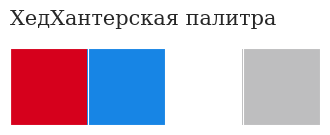

In [71]:
hh_red = '#d6001c'
hh_blue = '#1785e5'
hh_black = '#ffffff'
hh_gray = '#bebebf'
sns.palplot(['#d6001c', '#1785e5', '#ffffff','#bebebf'])

plt.title("ХедХантерская палитра",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

## Построить график компаний с самым большим кол-вом вакансий

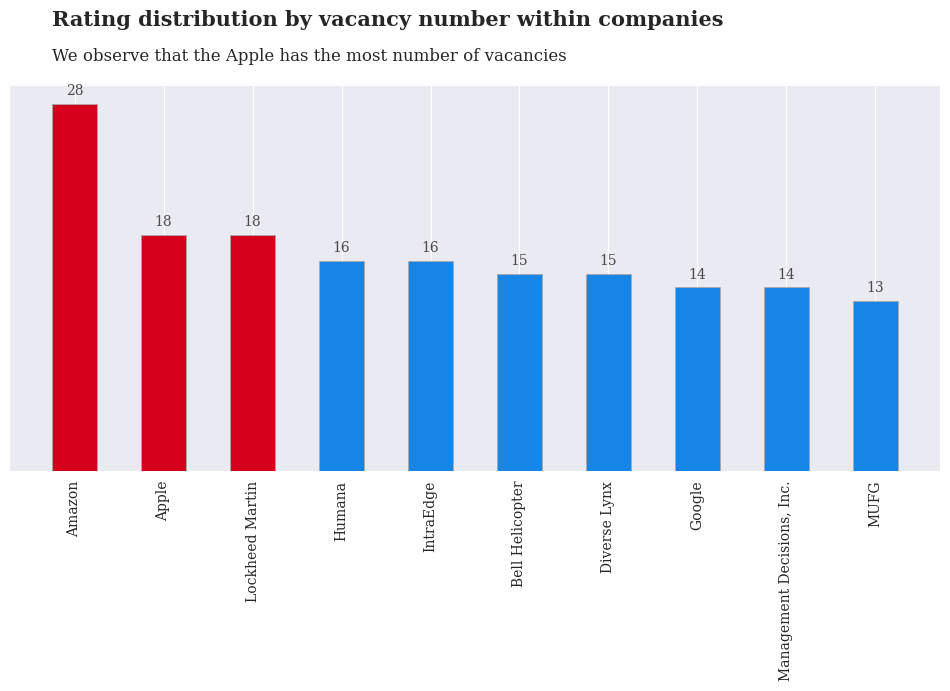

In [70]:
groups = df.groupby('Company Name').groups
sorted_groups = sorted({k: len(v) for k, v in groups.items()}.items(), key=lambda item: item[1], reverse=True)
top_ten = dict(sorted_groups[:10])
# plt.bar(range(len(top_ten)), list(top_ten.values()), align='center')
# plt.xticks(range(len(top_ten)), list(top_ten.keys()), rotation=90)
# plt.show()
color_map = ['#1785e5' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#d6001c'
fig, ax = plt.subplots(1,1, figsize=(12, 5))
ax.bar(range(len(top_ten)), list(top_ten.values()), width=0.5,
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)
for i in range(len(top_ten)):
    ax.annotate(f"{list(top_ten.values())[i]}",
                   xy=(i, list(top_ten.values())[i]+1),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.set_xticks(range(10))
ax.set_xticklabels(list(top_ten.keys()), fontfamily='serif', rotation=90)
fig.text(0.16, 1, 'Rating distribution by vacancy number within companies', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89,
'''We observe that the Apple has the most number of vacancies
'''
, fontsize=12, fontweight='light', fontfamily='serif')
ax.set_yticks([])
plt.show()

# Построить график самых популярный названий в вакансиях

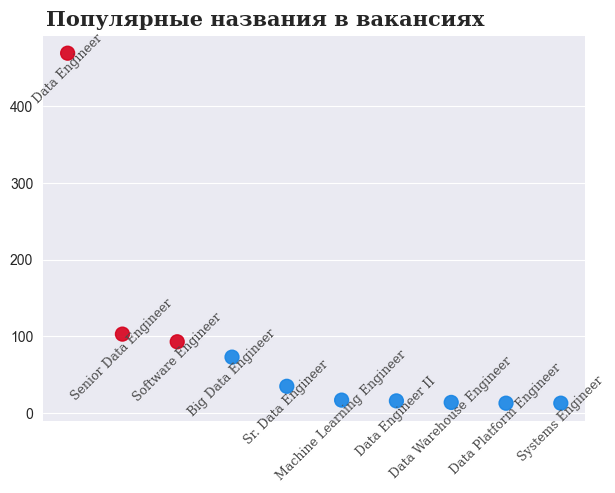

In [110]:
groups = df.groupby('Job Title').groups
sorted_groups = sorted({k: len(v) for k, v in groups.items()}.items(), key=lambda item: item[1], reverse=True)
top_ten = dict(sorted_groups[:10])
# plt.plot(np.arange(0, len(top_ten), 1), top_ten.values())
# plt.xticks(np.arange(0, len(top_ten), 1), top_ten.keys(), rotation=90)
# plt.grid()
# plt.show()
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
fig.text(0.13, 0.9, 'Популярные названия в вакансиях', fontsize=15, fontweight='bold', fontfamily='serif')
color_map = [hh_blue for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  hh_red
ax.scatter(range(10), top_ten.values(), color=color_map,s=100, alpha=0.9, label='Average release date')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
for i in range(len(top_ten)):
    ax.annotate(f"{list(top_ten.keys())[i]}",
                   xy=(i, list(top_ten.values())[i]-20),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif', fontsize=9,
                   color='#4a4a4a', rotation=45)
ax.set_xticks([])
plt.show()

# Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

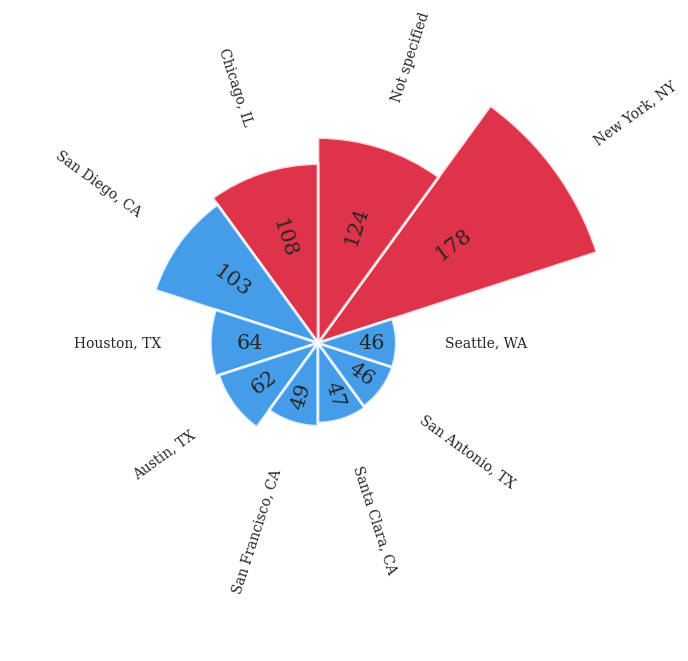

In [122]:
groups = df.groupby('Headquarters').groups
sorted_groups = sorted({k: len(v) for k, v in groups.items()}.items(), key=lambda item: item[1], reverse=True)
top_ten = dict(sorted_groups[:10])
# plt.pie(x=top_ten.values(), labels=top_ten.keys(), autopct='%1.1f%%',
#         shadow=False, startangle=45)
# plt.show()
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 1
labelPadding = 30
max = np.max(list(top_ten.values()))
slope = (max - lowerLimit) / max
heights = slope * np.array(list(top_ten.values())) + lowerLimit
width = 2*np.pi / len(top_ten)
indexes = list(range(1, len(top_ten)+1))
angles = [element * width for element in indexes]
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color=color_map,alpha=0.8
)
for bar, angle, height, label, val in zip(bars,angles, heights, list(top_ten.keys()), list(top_ten.values())):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center',
        rotation=rotation,
        rotation_mode="anchor")

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height()/2,
        s=val,
        ha=alignment, fontsize=15,fontfamily='serif', font='bold',
        va='center',
        rotation=rotation,
        rotation_mode="anchor")
plt.show()

# Построить график популярности по колонке Type of ownership, относительно численности вакансий

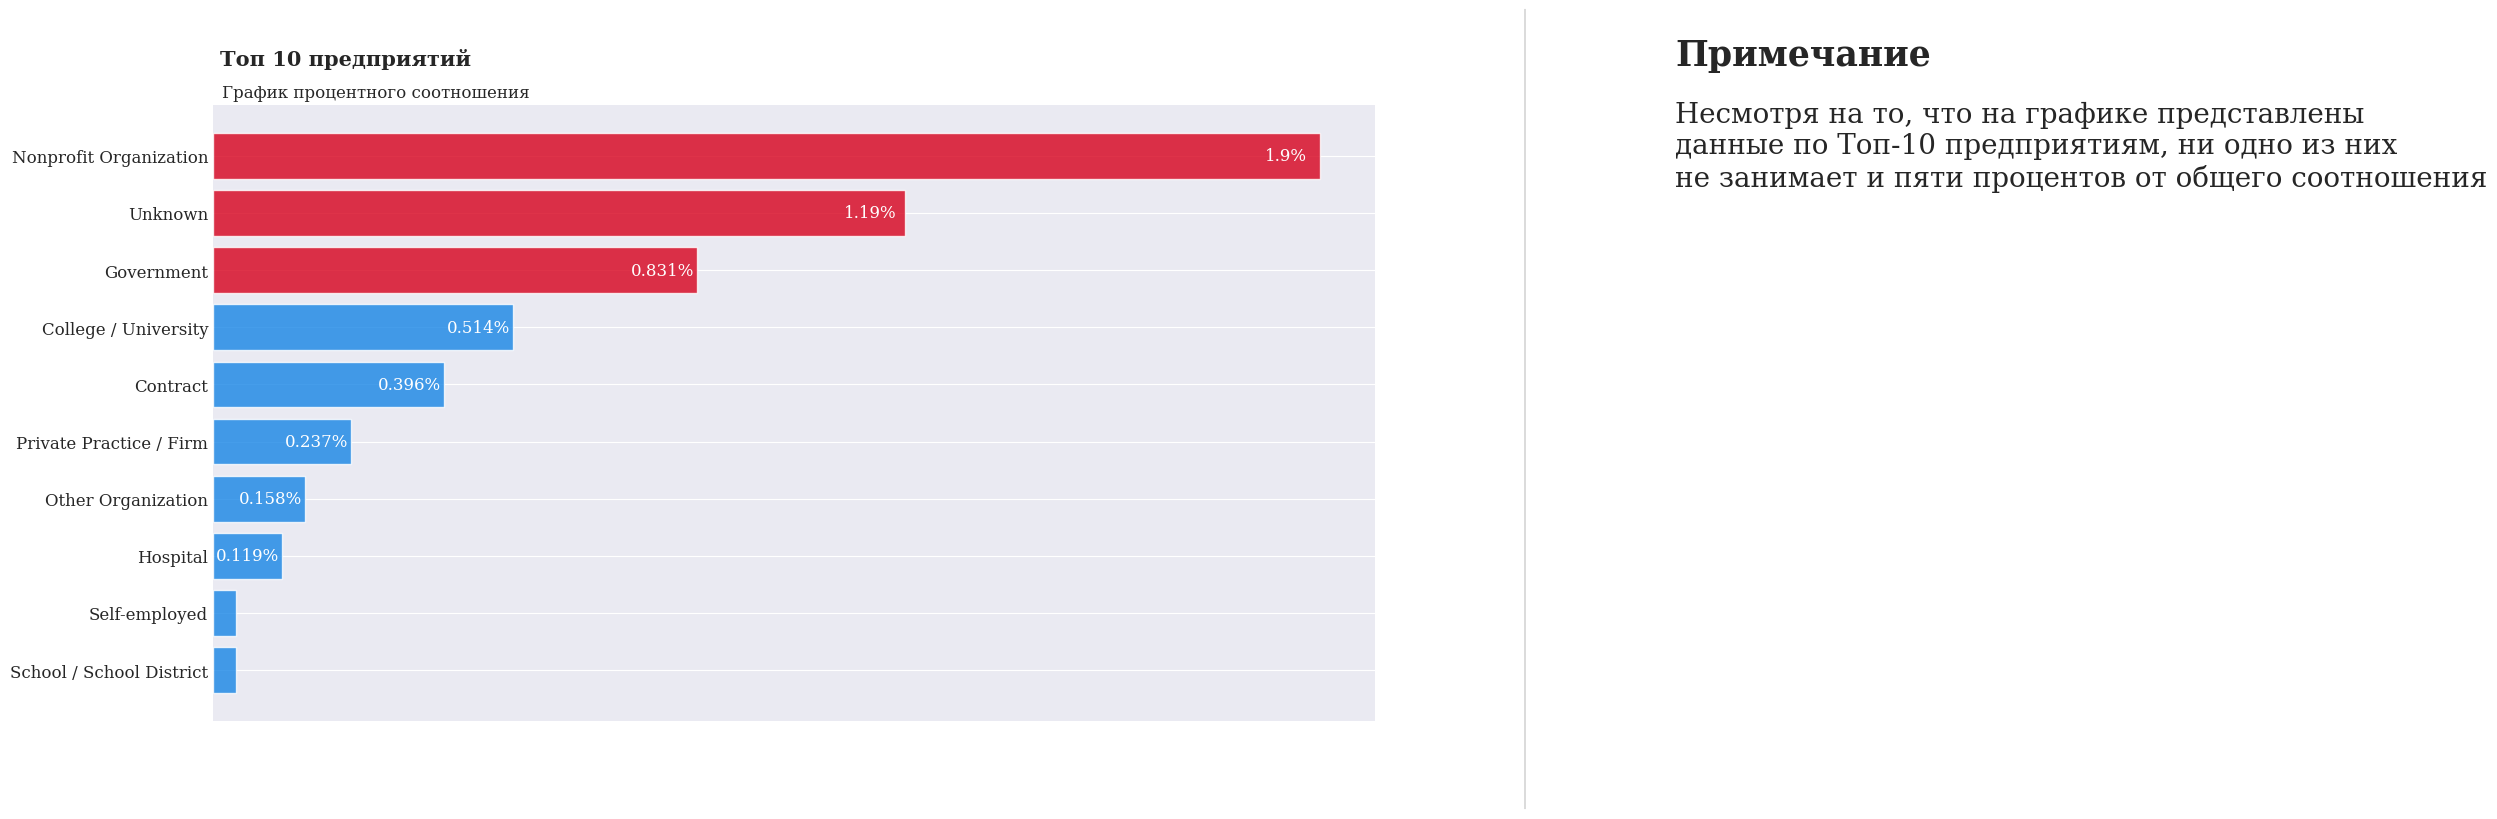

In [150]:
groups = df.groupby('Type of ownership').groups
sorted_groups = sorted({k: len(v) for k, v in groups.items()}.items(), key=lambda item: item[1], reverse=False)
top_ten = dict(sorted_groups[:10])
# plt.barh(range(len(top_ten)), list(top_ten.values()), align='center')
# plt.yticks(range(len(top_ten)), list(top_ten.keys()))
# plt.show()
color_map = [hh_blue for _ in range(10)]
color_map[-1] = color_map[-2] = color_map[-3] =  hh_red
fig, ax = plt.subplots(1,1,figsize=(15, 8),)
ax.barh(range(len(top_ten)), list(top_ten.values()),
        color=color_map, alpha=0.8, label='Movie')
ax.set_xticks([])
ax.set_yticks(range(10))
ax.set_yticklabels(list(top_ten.keys()), fontfamily='serif', fontsize=11)
for i in range(len(top_ten)):
    ax.annotate(f"{list(top_ten.values())[i]/len(df)*100:.3}%",
                   xy=(list(top_ten.values())[i]-1.5, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
fig.text(0.13, 0.93, 'Топ 10 предприятий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.89, 'График процентного соотношения', fontsize=12,fontfamily='serif')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
fig.text(1.1, 0.93, 'Примечание', fontsize=25, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.74, '''
Несмотря на то, что на графике представлены
данные по Топ-10 предприятиям, ни одно из них
не занимает и пяти процентов от общего соотношения
'''
         , fontsize=20, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

# Построить график популярности по секторам работы

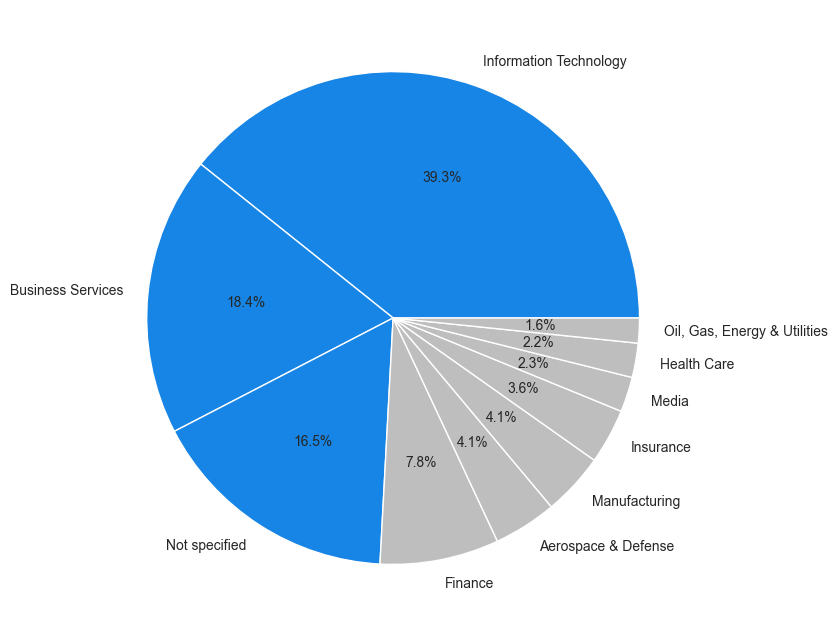

In [156]:
groups = df.groupby('Sector').groups
sorted_groups = sorted({k: len(v) for k, v in groups.items()}.items(), key=lambda item: item[1], reverse=True)
top_ten = dict(sorted_groups[:10])
# plt.pie(x=top_ten.values(), labels=top_ten.keys(), autopct='%1.1f%%',
#         shadow=False, startangle=45)
# plt.show()

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=False)
plt.axis('off')
color_map = [hh_gray for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  hh_blue
ax.pie(x=list(top_ten.values()), labels=list(top_ten.keys()), autopct='%1.1f%%', colors=color_map)
plt.show()

# Построить график используя сектора работы и средний уровень зарплат в них

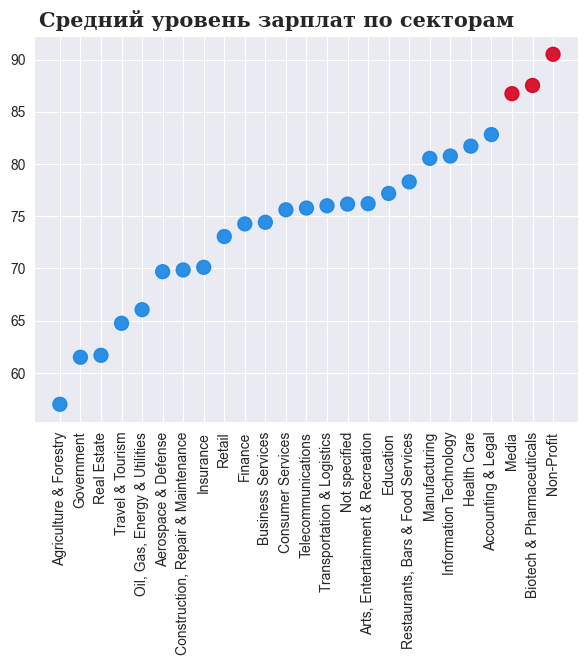

In [215]:
df_new = df[['Sector', 'Salary Estimate']]
groups = df_new.groupby('Sector').groups
group_mean_salary = {k: np.mean([df_new['Salary Estimate'][i] for i in list(v)]) for k, v in groups.items()}
sorted_gms = {k: v for k, v in sorted(group_mean_salary.items(), key=lambda item: item[1])}
# plt.plot(np.arange(0, len(sorted_gms), 1), sorted_gms.values())
# plt.xticks(np.arange(0, len(sorted_gms), 1), sorted_gms.keys(), rotation=90)
# plt.grid()
# plt.show()
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
fig.text(0.13, 0.9, 'Средний уровень зарплат по секторам', fontsize=15, fontweight='bold', fontfamily='serif')
color_map = [hh_blue for _ in range(len(sorted_gms))]
color_map[-1] = color_map[-2] = color_map[-3] =  hh_red
ax.scatter(range(len(sorted_gms.values())), list(sorted_gms.values()), color=color_map,
           s=100, alpha=0.9, label='Average release date')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.set_xticks(range(len(sorted_gms)))
ax.set_xticklabels(list(sorted_gms.keys()), rotation=90)
plt.show()

## Построить гистограмму распределения рейтинга компаний

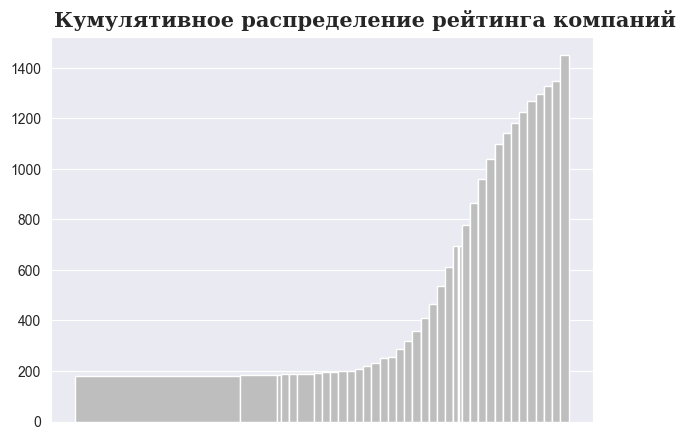

In [251]:
df_new = df[['Company Name', 'Rating']]
groups = df_new.groupby('Company Name').groups
group_mean_rating = {k: np.mean([df_new['Rating'][i] for i in list(v)]) for k, v in groups.items()}
counts, bins = np.histogram(list(group_mean_rating.values()),
                            bins=np.array(sorted(list(set(list(group_mean_rating.values()))))),
                            )
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
fig.text(0.13, 0.9, 'Кумулятивное распределение рейтинга компаний', fontsize=15, fontweight='bold', fontfamily='serif')
ax.hist(bins[:-1], bins, weights=counts, cumulative=True, color=hh_gray)
ax.set_xticks([])
plt.show()


## Построить график средних зарплат по популярным компаниям

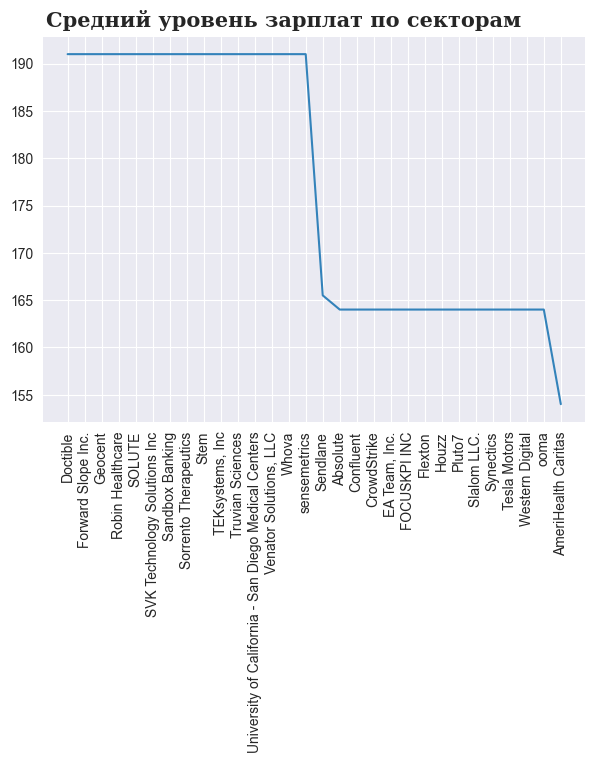

In [257]:
new_df = df[['Company Name', 'Salary Estimate']]
groups = new_df.groupby('Company Name').groups
group_mean_salary = {k: np.mean([new_df['Salary Estimate'][i] for i in list(v)]) for k, v in groups.items()}
gms_sorted = sorted(group_mean_salary.items(), key=lambda item: item[1], reverse=True)
top_25_gmss = dict(gms_sorted[:30])
# plt.plot(np.arange(25), top_25_gmss.values())
# plt.xticks(np.arange(25), top_25_gmss.keys(), rotation=90)
# plt.show()
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
fig.text(0.13, 0.9, 'Средний уровень зарплат по секторам', fontsize=15, fontweight='bold', fontfamily='serif')
color_map = [hh_blue for _ in range(len(top_25_gmss))]
color_map[-1] = color_map[-2] = color_map[-3] =  hh_red
ax.plot(range(len(top_25_gmss)), list(top_25_gmss.values()), alpha=0.9, label='Average release date')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.set_xticks(range(len(top_25_gmss)))
ax.set_xticklabels(list(top_25_gmss.keys()), rotation=90)
plt.show()

## Построить описаний вакансий облако тегов, исследовать самые популярные слова

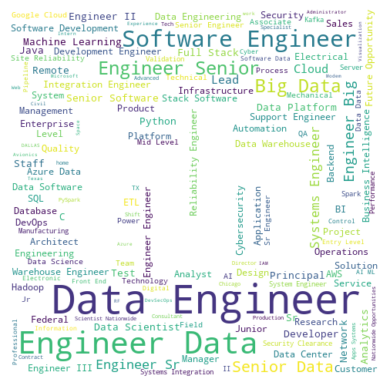

In [283]:
from PIL import Image
mask = np.array(Image.open('480px-HeadHunter_logo.png'))
titles = " ".join(df['Job Title'].values)
wordcloud = WordCloud(background_color = 'white',
                      max_words = 150,
                      mask = mask).generate(titles,)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()